In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [24]:
import re
import json

In [3]:
df = pd.read_csv("./data/output.csv", delimiter="\t")

In [4]:
rating_pattern = re.compile(r"((- ?)?\d+)/10")

In [5]:
def is_rating(tweet):
    match = rating_pattern.search(tweet)
    return match is not None

In [6]:
def get_rating(tweet):
    match = rating_pattern.search(tweet)
    return int("".join(match.group(1).split()))

In [7]:
def strip_ratings(tweet):
    tweet = re.sub(rating_pattern, "", tweet)
    tweet = re.sub("[Mm]inus", "", tweet)
    return tweet

In [8]:
def strip_links(tweet):
    tweet = re.sub("https?://t.co/\w+", "", tweet)
    return tweet

In [9]:
len(df)

19353

In [47]:
df["is_rating_tweet"] = df.tweet.apply(is_rating)
rating_tweets = df[df["is_rating_tweet"] & df["reply_to"].eq("[]")]
rating_tweets["rating"] = rating_tweets.tweet.apply(get_rating)
rating_tweets["cleaned"] = rating_tweets.tweet.apply(strip_ratings).apply(strip_links)
rating_tweets["img_url"] = rating_tweets.photos.apply(eval).apply(lambda x: x[0] if len(x) > 0 else None)

<ipython-input-47-9aeb1791c766>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_tweets["rating"] = rating_tweets.tweet.apply(get_rating)
<ipython-input-47-9aeb1791c766>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_tweets["cleaned"] = rating_tweets.tweet.apply(strip_ratings).apply(strip_links)
<ipython-input-47-9aeb1791c766>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [48]:
rating_tweets[[
    "rating",
    "cleaned",
    "tweet",
    "created_at",
    "replies_count",
    "retweets_count",
    "likes_count",
    "img_url"
]].to_csv("data/cleaned.csv", index=False)

In [49]:
rating_tweets["img_url"].to_csv("data/images.csv", index=False)

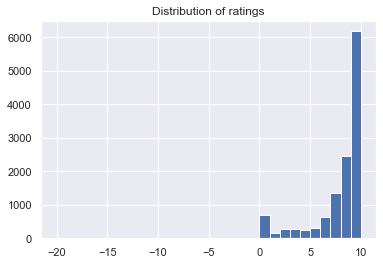

In [13]:
plt.figure()
plt.title("Distribution of ratings")
rating_tweets.rating.sort_values()[:-1].hist(bins=30)
plt.savefig("./figures/rating_distribution.pdf")

In [14]:
rating_tweets.rating.describe()

count    12619.000000
mean         7.625485
std          2.940338
min        -20.000000
25%          7.000000
50%          8.000000
75%         10.000000
max        100.000000
Name: rating, dtype: float64

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,is_rating_tweet,rating,cleaned
21,1372195567116316679,1372195567116316679,2021-03-17 10:38:12 EDT,2021-03-17,10:38:12,-400,1248996730940448774,ratemyskyperoom,Room Rater,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,True,10,Room Rater PSA from Canada and @brittlestar. R...
71,1371833175475941392,1371833175475941392,2021-03-16 10:38:11 EDT,2021-03-16,10:38:11,-400,1248996730940448774,ratemyskyperoom,Room Rater,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,True,10,Good morning from Canada and @GurdeepPandher. ...
125,1371310324033363970,1371310324033363970,2021-03-15 00:00:33 EDT,2021-03-15,00:00:33,-400,1248996730940448774,ratemyskyperoom,Room Rater,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,True,10,Room Rater PSA from Canada and @brittlestar. R...
130,1371261361037082624,1371261361037082624,2021-03-14 20:45:59 EDT,2021-03-14,20:45:59,-400,1248996730940448774,ratemyskyperoom,Room Rater,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,True,10,@maddow
147,1371129091936686081,1371129091936686081,2021-03-14 12:00:24 EDT,2021-03-14,12:00:24,-400,1248996730940448774,ratemyskyperoom,Room Rater,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,True,10,#WuTangForever @jheil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19263,1250788431942299648,1250788431942299648,2020-04-16 10:09:35 EDT,2020-04-16,10:09:35,-400,1248996730940448774,ratemyskyperoom,Room Rater,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,True,9,Our apologies. I thought Tulane...and assumed....
19279,1250541784288997376,1250541784288997376,2020-04-15 17:49:29 EDT,2020-04-15,17:49:29,-400,1248996730940448774,ratemyskyperoom,Room Rater,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,True,5,"Upon further review, we’re taking one point ba..."
19307,1250051137899618305,1250051137899618305,2020-04-14 09:19:50 EDT,2020-04-14,09:19:50,-400,1248996730940448774,ratemyskyperoom,Room Rater,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,True,8,"After careful consideration, the initial ratin..."
19320,1249854322474545152,1249850719022153728,2020-04-13 20:17:46 EDT,2020-04-13,20:17:46,-400,1248996730940448774,ratemyskyperoom,Room Rater,NaN,...,NaN,NaN,[],NaN,NaN,NaN,NaN,True,5,. *
